# Numpy

* Пакет для Python, реализующий многомерные массивы
* Массивы **статически типизированные**. Тип элементов определяется при создании массива.
* Массивы эффективно используют память.
* Методы линейной алгебры в numpy реализованы на C и Fortran, что обеспечивает хорошую производительность.
* Пакет numpy активно используется в научных проектах по всему миру.

In [2]:
import numpy as np
import math

## Создание массивов

Существует несколько способов создания новых numpy массивов:
* через списки и кортежи Python
* используя специальные функции numpy такие, как `arange`, `linspace`, и так далее.
* вычитывая данные из файлов

### 1D массивы:

In [2]:
a = np.array([0,1,2,3])
a

array([0, 1, 2, 3])

In [3]:
type(a), a.dtype

(numpy.ndarray, dtype('int64'))

In [4]:
a.ndim, a.shape, len(a)

(1, (4,), 4)

In [5]:
b = np.array((3, 4, 5))
b

array([3, 4, 5])

В numpy существует множество функций для генерации массивов:

#### `arange`

Генерирует значения в интервале [start, stop) с шагом step. Аналог встроенной функции Python `range`. На уровне типов они, конечно, отличаются. `np.arange` возвращает обычный numpy-массив, в то время как `range` является lazy sequence/lazy iterable и стоит в общем ряду с `list` и `tuple`. Funny fact: `range` не является итератором -- он не "иссякает", для него нельзя вызвать `next()` и можно `len()`, но, в отличие от списка, он lazy

In [ ]:
x = np.arange(0, 10, 1) # аргументы: start, stop, step
type(range(10))

In [ ]:
x = np.arange(-1, 1, 0.1)
x

#### `linspace` и `logspace`

`linspace` Генерирует равномерно распределенные числа, включая конечные точки.

`logspace` То же, но в логарифмической шкале.

In [6]:
np.linspace(0, 10, 10) # аргументы: start, stop, число точек

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [7]:
np.logspace(0.1, 1, 4, base=2)

array([1.07177346, 1.31950791, 1.62450479, 2.        ])

#### `zeros`, `ones`, `zeros_like` и `ones_like`

In [ ]:
np.zeros((5,))   # Аргумент должен быть кортежем

In [ ]:
a = np.ones((4,))
a

In [ ]:
b = np.zeros_like(a)
b

In [ ]:
c = np.ones_like(b)
c

### Многомерные массивы

In [8]:
# Матрица
m = np.array([[1., 2.], [3., 4.]])
m

array([[1., 2.],
       [3., 4.]])

In [9]:
type(m), m.dtype

(numpy.ndarray, dtype('float64'))

In [10]:
m.ndim, np.shape(m), len(m), np.size(m)

(2, (2, 2), 2, 4)

При попытке назначить значение другого типа будет выдана ошибка:

In [ ]:
m[0,0] = 'hello' 

#### `zeros`, `ones`, `zeros_like` и `ones_like`

In [11]:
a = np.ones((3, 3))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
b = np.zeros((2, 2))
b

#### Другие функции

In [ ]:
c = np.eye(3) # единичная матрица
c

In [ ]:
d = np.diag([3, 5, 7]) # диагональная матрица
d

### Упражнение 1
Построить диагональную матрицу, на диагонали которой расположены числа от 0 до 3.

In [13]:
d = np.diag(np.arange(0, 4))
d

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

### Упражнение 2

Создать матрицу размерности 3x3x3 со случайными значениями, имеющими равномерное распределение от 1 до 5.

## Копирование в NumPy

Как мы помним, в Python при присваивании не происходит копирование объектов. 

In [14]:
m = np.array([[1, 2], [3, 4]])
m

array([[1, 2],
       [3, 4]])

In [15]:
n = m

In [16]:
# Изменение N меняет M
n[0, 0] = 10
n

array([[10,  2],
       [ 3,  4]])

In [17]:
m

array([[10,  2],
       [ 3,  4]])

Глубокая копия создается в NumPy с помощью функции `copy`:

In [ ]:
n = np.copy(m)

In [ ]:
# теперь при изменении N M остается нетронутым
n[0,0] = -5
n

In [ ]:
m

Слайсинг в numpy создает лишь представление изначального массива, т.е. копирования в памяти не происходит.

При изменении представления меняется и изначальный массив:

In [18]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [20]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [ ]:
a # (!!)

In [ ]:
a = np.arange(10)
b = a[::2].copy() # глубокое копирование
b[0] = 12
a

## Слияние массивов

Функции `vstack`, `hstack` и `concatenate` позволяются составить общий массив из нескольких массивов:

### `concatenate`

In [8]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [9]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [10]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [11]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### `hstack` и `vstack`

In [12]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [13]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Индексация

Доступ к данным массива организуется с помощью индексов и оператора `[]`.

In [14]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
a[0], a[2], a[-1]

(0, 2, 9)

Для многомерных массивов индексами является кортеж целых чисел:

In [16]:
m = np.diag(np.arange(3))
m

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [ ]:
m[1, 1]

In [ ]:
m[(1, 1)]

Можно использовать "`:`" для получения доступа к целой колонке или строке: 

In [ ]:
m[1, :] # строка 1

In [ ]:
m[:, 2] # колонка 2

Присваивание новых значений элементам массива:

In [ ]:
m[2, 1] = 10
m

In [17]:
m[1, :] = 5
m[: ,2] = -1

In [ ]:
m

## Слайсинг

NumPy поддерживает слайсинг, как и списки с кортежами в Python:

In [ ]:
a = np.arange(10)
a

Все три параметра слайсинга являются опциональными: по умолчанию `start` равен **0**, `end` равен последнему элемену и `step` равен **1** в `a[start:stop:step]`:

In [ ]:
a[::] # все параметры слайсинга имеют значения по умолчанию

In [ ]:
a[1:3]

In [ ]:
a[:3]

In [ ]:
a[3:]

In [ ]:
a[2:9:2] 

Отрицательные индексы отсчитываются от конца массива:

In [ ]:
a[-1] # последний элемент массива

In [ ]:
a[-3:] # последние три элемента

Слайсы являются представлениями массива, а потому являются изменяемыми:

In [ ]:
a[1:3] = [-2,-3]
a

Слайсинг работает точно так же и для многомерных массивов:

In [ ]:
m = np.random.randint(1,100, size=(4, 4))
m

In [ ]:
m[1:4, 1:4]

In [ ]:
m[::2, ::2]

### Упражнение 3
Создать нулевую матрицу размерности 5х5 с единицами по ее "границам".

In [30]:
a = np.zeros((5, 5), dtype=np.int_)
a

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [33]:
a[0,:] = 1
a[:,0] = 1
a[-1,:] = 1
a[:,-1] = 1
a

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

In [35]:
a = np.ones((5, 5), dtype=np.int_)
a[1:-1, 1:-1] = 0
a

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

## Линейная алгебра

Код, написанный на numpy становится эффективным тогда, когда он достаточно векторизован (т.е. векторные и матричные операции используются в бОльшей части программы).

### Поэлементные операции

Все арифметические операции по умолчанию являются поэлементными:

In [36]:
a = np.arange(4)
a + 1

array([1, 2, 3, 4])

In [37]:
5*a

array([ 0,  5, 10, 15])

In [38]:
2**a

array([1, 2, 4, 8])

In [39]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

### Операции между массивами

In [40]:
a = np.arange(4)
b = np.ones(4) + 3
print('a = ', a)
print('b = ', b)
a - b

a =  [0 1 2 3]
b =  [4. 4. 4. 4.]


array([-4., -3., -2., -1.])

In [41]:
a * b

array([ 0.,  4.,  8., 12.])

Сравнения:

In [45]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
b[a == b]

array([2, 4])

In [43]:
a > b

array([False, False,  True, False])

Логические операции:

In [46]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [47]:
a | b

array([ True,  True,  True, False])

In [48]:
np.logical_and(a, b)

array([ True, False, False, False])

In [ ]:
a & b

Использование логических операторов позволяет обращаться к элементам массива через маску:

In [ ]:
c = np.array([1, 2, 3, 4], dtype=int)
d = np.array([1, 2, 5, 6], dtype=int)
c[c == d]

### Упражнение 4
Создать случайный вектор размера 10 и найти его среднее значение.

In [61]:
rng = np.random.default_rng()
rng.integers(10)
a = rng.integers((10,10, 10, 10, 10))
a.mean()

6.2

### Упражнение 5
Создать случайную матрицу размерности 10х2, хранящую декартовы координаты. Затем конвертируйте их в полярные координаты.

In [8]:

a = np.random.random((10, ))
np.quantile(a, 0.1)

b = np.random.rand(10, 2)
y = b[:,0]
x = b[:,1]
f = lambda x, y: math.sqrt(x ** 2 + y ** 2)
phi = np.arctan2(y, x)
np.concatenate((x, y), axis = 0)
phi


array([1.17752105, 0.53457583])

### Матричная алгебра

Перемножение массивов является поэлементным. Для матричного умножения необходимо использовать функцию `dot`:

In [9]:
m = np.array([[1., 2.], [3., 4.]])
m

array([[1., 2.],
       [3., 4.]])

In [14]:
x = np.zeros((2,2), dtype=np.float_)

In [10]:
m * m

array([[ 1.,  4.],
       [ 9., 16.]])

In [11]:
m.dot(m)

array([[ 7., 10.],
       [15., 22.]])

In [12]:
m @ m

array([[ 7., 10.],
       [15., 22.]])

### Трансформирование массивов

Для транспонирования матриц используется либо `.T`, либо функция `transpose`:

In [ ]:
m

In [ ]:
m.T

In [ ]:
m.transpose()

Другие математические функции:

In [ ]:
c = np.matrix([[1j, 2j], [3j, 4j]])
c

In [ ]:
np.conjugate(c)

Эрмитово-сопряженная матрица(transpose + conjugate):

In [ ]:
c.H

Вещественная и мнимая части могут быть получены с помощью `real` и `imag`:

In [ ]:
np.real(c) # то же: c.real

In [ ]:
np.imag(c) # то же: c.imag

Модули элементов матрицы:

In [ ]:
np.abs(c)

### Упражнение 6
Найти ближайшее значение к числу 4 в векторе [4.3, 1.0, 3.9, 5.0, 2.0, 1.9]

In [52]:
a = np.array([4.3, 1.0, 3.9, 5.0, 2.0, 1.9])
#f = lambda x: abs(x - 4)
#f(a).argmin()
idx = np.abs(a - 4).argmin()
print(a[idx])


3.9


### Матричные вычисления

#### inverse

In [7]:
c = np.array([[-1, 2], [-2, 2]])
np.linalg.inv(c) # то же: C.I 

array([[ 1. , -1. ],
       [ 1. , -0.5]])

In [8]:
c.T * c

array([[ 1, -4],
       [-4,  4]])

#### determinant

In [24]:
np.linalg.det(c)

2.0

In [ ]:
np.linalg.det(c.I)

## Векторизация функций

Numpy предлагает средства для создания векторизованных оберток над функциями, которые изначально принимают на вход скалярные значения.

In [53]:
def foo(x):
    if x >= 0:
        return 1
    else:
        return 0

In [55]:
foo(np.array([-3, -2, -1, 0, 1, 2, 3]).any())

1

Эта функция работает для скалярных данных. 

Чтобы это функция принимала векторные значения, необходимо провести векторизацию с помощью функии `vectorize`:

In [56]:
foo_vec = np.vectorize(foo)

In [57]:
foo_vec(np.array([-3, -2, -1, 0, 1, 2, 3]))

array([0, 0, 0, 1, 1, 1, 1])

# Matplotlib

* Пакет для Python, используемый для создания качественных 2D визуализацией (есть минимальная поддержка 3D)
* Возможность создавать интерактивные графики
* Добавление множества графиков на один рисунок с кастомным расположением
* Экспорт в различные форматы изображений
* Есть поддержка анимаций

In [9]:
# Позволяет matplotlib отображать графики сразу в notebook.
%matplotlib inline

## Matplotlib API

Импортирование модуля `matplotlib.pyplot` под именем `plt`:

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

Простейший пример построения графиков в matplotlib:

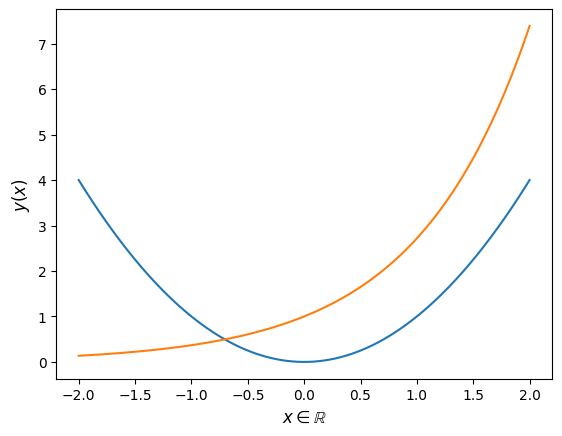

In [15]:
x = np.linspace(-2., 2., 256, endpoint=True)
y1 = x**2
y2 = np.exp(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel(r'$x \in \mathbb{R}$', fontsize=12)
plt.ylabel(r'$y(x)$', fontsize=12)
plt.show()

Рекомендуется создавать отдельный объект для каждого более-менее сложного графика. Это можно реализоваться, например, с помощью функии `subplots`:

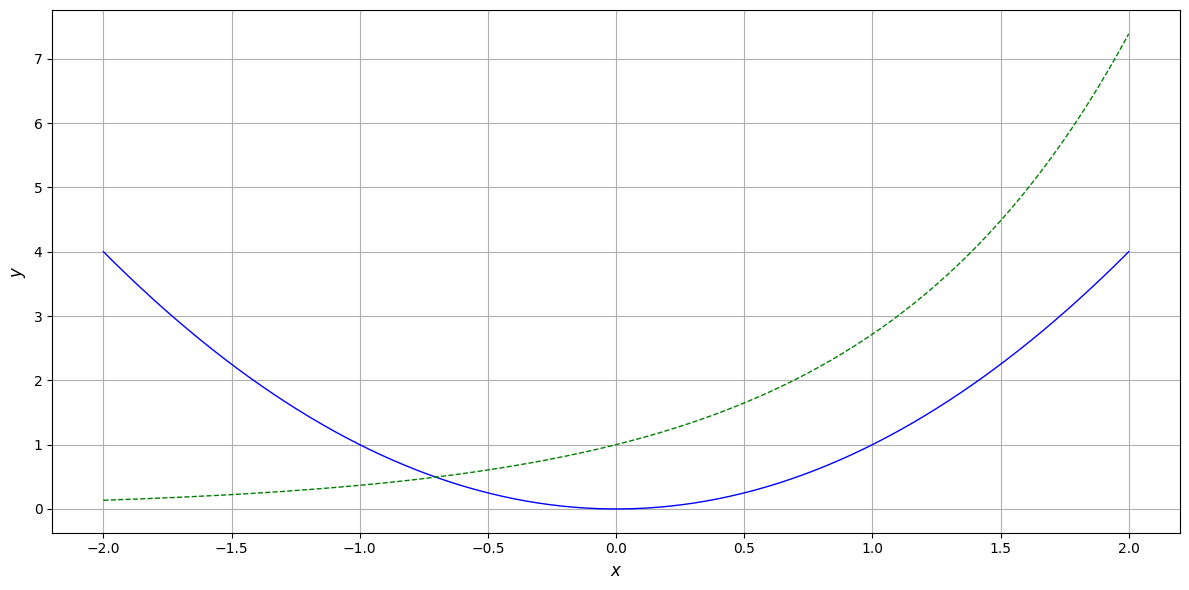

In [16]:
# Сетка графиков -- 1x1. Размер задается с помощью figsize.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(x, y1, color="blue", linewidth=1.0, linestyle="-")
ax.plot(x, y2, color="green", linewidth=1.0, linestyle="--")
ax.grid()
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
fig.tight_layout()
plt.show()

Множественные графики

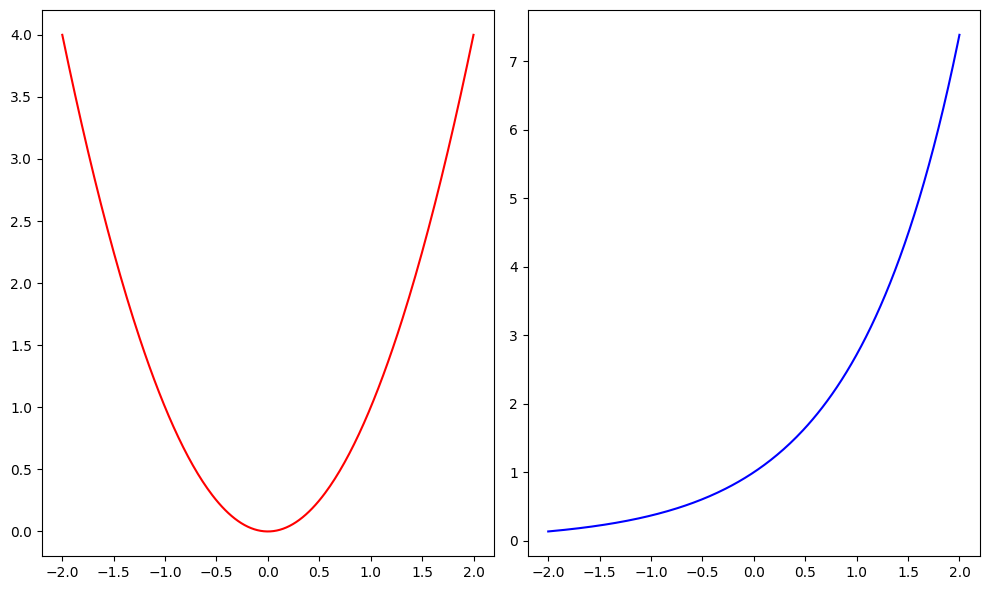

In [17]:
# Создаем 2 графика (в 2 колонках)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(x, y1, 'r')
axes[1].plot(x, y2, 'b')
fig.tight_layout()

## Сохранение графиков

Текущий график можно сохранить, вызвав метод `savefig` класса `Figure`:

In [66]:
fig.savefig("filename.png")

Также можно указать DPI и различные форматы:

In [ ]:
fig.savefig("filename.pdf", dpi=200)

### Легенды, описания осей и графиков

**Заголовок графика**


`axes.set_title("title")`

**Описания осей**


`axes.set_xlabel("x")
axes.set_ylabel("y")`

**Легенда**

Легенды могут создаваться двумя способами. Первый -- явно через метод `legend`:

`axes.legend(["curve1", "curve2"])`

Второй метод -- использование `label="label text"` при вызове `plot` с последующим вызовом метода `legend`: 

`axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()`

Также можно выбрать расположение легенды на графике:

`ax.legend(loc=0) # автовыбор
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')`

Пример использования описанного выше:

In [21]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc='upper left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

NameError: name 'plt' is not defined